Inpendent Variables:
    GDP per capita
    Human Development Index (HDI)
    Total Population
    Transparency Index

Dependent Variables:
    Total Cases per million
    Total Deaths per million
    People fully vaccinated per hundred
    
Other Data Columns:
    ISO Code
    Continent
    Location
    Date

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from scipy.stats import pearsonr
import gmaps
import requests
import gmaps.datasets
import ipywidgets as widgets
import seaborn as sns; sns.set(style='white')
import gmaps.geojson_geometries
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import ttest_ind

In [2]:
from configMarc import g_key
gmaps.configure(api_key=g_key)

In [3]:
# Study data files
owidCovidData = "Resources/owid-covid-data-20210430.csv"
transparencyData = "Resources/Transparency Index.csv"

CovidData = pd.read_csv(owidCovidData)
Transparency = pd.read_csv(transparencyData)
# Transparency

In [4]:
# eliminate extra columns
CovidClean = CovidData.copy()
CovidClean.drop([ 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'new_cases_per_million', 
                 'new_cases_smoothed_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 
                 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 
                 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests', 'total_tests_per_thousand', 
                 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 
                 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations', 'new_vaccinations_smoothed', 
                 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'new_vaccinations_smoothed_per_million', 'stringency_index',
                 'median_age', 'aged_65_older', 'aged_70_older', 'extreme_poverty', 'cardiovasc_death_rate',
                 'diabetes_prevalence', 'female_smokers', 'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy'],
                 axis = 1, inplace = True)


# limit to max date
CovidClean = CovidClean[CovidClean['date'].isin(['2021-04-27'])]


# rename "Location" to "Country"
CovidClean.rename(columns={"location":"Country"}, inplace=True)

# rename everything else for ease
CovidClean.rename(columns={"total_cases_per_million":"Cases", "total_deaths_per_million": "Deaths", "people_fully_vaccinated_per_hundred":"Vaxxed", 
                           "population": "Population", "population_density": "Density","gdp_per_capita": "GDP", "human_development_index": "HDI"}, inplace=True)

# merge with Transparency (inner join)
CovidAll= pd.merge(CovidClean, Transparency, on=["Country"], how="inner")

CovidClean
CovidAll
CovidAll.to_csv("Resources/CovidWorkingData.csv", index = False)


In [5]:
CovidClean

,iso_code,continent,Country,date,Cases,Deaths,Vaxxed,Population,Density,GDP,HDI
428,AFG,Asia,Afghanistan,2021-04-27,1521.385,66.738,NaN,3.892834e+07,54.422,1803.987,0.511
873,OWID_AFR,NaN,Africa,2021-04-27,3373.910,90.104,0.36,1.340598e+09,NaN,NaN,NaN
1306,ALB,Europe,Albania,2021-04-27,45429.147,828.063,NaN,2.877800e+06,104.871,11803.431,0.795
1739,DZA,Africa,Algeria,2021-04-27,2767.186,73.544,NaN,4.385104e+07,17.348,13913.839,0.748
2166,AND,Europe,Andorra,2021-04-27,169818.158,1604.866,NaN,7.726500e+04,163.755,NaN,0.868
...,...,...,...,...,...,...,...,...,...,...,...
83899,VNM,Asia,Vietnam,2021-04-27,29.351,0.360,NaN,9.733858e+07,308.127,6171.884,0.704
84366,OWID_WRL,NaN,World,2021-04-27,19078.988,402.198,3.21,7.794799e+09,58.045,15469.207,0.737
84754,YEM,Asia,Yemen,2021-04-27,208.543,40.468,NaN,2.982597e+07,53.508,1479.147,0.470
85165,ZMB,Africa,Zambia,2021-04-27,4972.706,67.940,NaN,1.838396e+07,22.995,3689.251,0.584


In [6]:
CovidContinent = CovidClean.copy()
# CovidClean = CovidClean[CovidClean['iso_code'].isin(["OWID_AFR"])]
# CovidClean = CovidClean.isna(CovidClean["Density"])
CovidContinent.isna()['continent']

Continent = CovidContinent.loc[CovidContinent.isna()['continent']]
Continent

,iso_code,continent,Country,date,Cases,Deaths,Vaxxed,Population,Density,GDP,HDI
873,OWID_AFR,NaN,Africa,2021-04-27,3373.910,90.104,0.36,1.340598e+09,NaN,NaN,NaN
4485,OWID_ASI,NaN,Asia,2021-04-27,8186.914,108.743,1.23,4.639847e+09,NaN,NaN,NaN
26402,OWID_EUR,NaN,Europe,2021-04-27,59322.749,1345.065,8.03,7.486801e+08,NaN,NaN,NaN
26868,OWID_EUN,NaN,European Union,2021-04-27,68344.672,1532.895,8.26,4.449191e+08,NaN,NaN,NaN
36517,OWID_INT,NaN,International,2021-04-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56786,OWID_NAM,NaN,North America,2021-04-27,62992.638,1424.390,17.78,5.920722e+08,NaN,NaN,NaN
58215,OWID_OCE,NaN,Oceania,2021-04-27,1015.399,24.462,0.14,4.267781e+07,NaN,NaN,NaN
71529,OWID_SAM,NaN,South America,2021-04-27,56768.938,1528.191,5.26,4.307598e+08,NaN,NaN,NaN
84366,OWID_WRL,NaN,World,2021-04-27,19078.988,402.198,3.21,7.794799e+09,58.045,15469.207,0.737


In [7]:
CovidAll

,iso_code,continent,Country,date,Cases,Deaths,Vaxxed,Population,Density,GDP,HDI,Score,Rank
0,AFG,Asia,Afghanistan,2021-04-27,1521.385,66.738,NaN,38928341.0,54.422,1803.987,0.511,19.0,165.0
1,ALB,Europe,Albania,2021-04-27,45429.147,828.063,NaN,2877800.0,104.871,11803.431,0.795,36.0,104.0
2,DZA,Africa,Algeria,2021-04-27,2767.186,73.544,NaN,43851043.0,17.348,13913.839,0.748,36.0,104.0
3,AGO,Africa,Angola,2021-04-27,789.320,17.860,NaN,32866268.0,23.890,5819.495,0.581,27.0,142.0
4,ARG,South America,Argentina,2021-04-27,64279.722,1385.063,1.95,45195777.0,16.177,18933.907,0.845,42.0,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,VEN,South America,Venezuela,2021-04-27,6812.540,73.217,NaN,28435943.0,36.253,16745.022,0.711,15.0,176.0
171,VNM,Asia,Vietnam,2021-04-27,29.351,0.360,NaN,97338583.0,308.127,6171.884,0.704,36.0,104.0
172,YEM,Asia,Yemen,2021-04-27,208.543,40.468,NaN,29825968.0,53.508,1479.147,0.470,15.0,176.0
173,ZMB,Africa,Zambia,2021-04-27,4972.706,67.940,NaN,18383956.0,22.995,3689.251,0.584,33.0,117.0


# REMOVING NAN FOR CASES OR DEATHS

In [8]:
# CovidAllTT = CovidAll[CovidAll['Deaths'].notna()]
# CovidAllTT = CovidAll[CovidAll['Cases'].notna()]
# CovidAllTT = CovidAll.drop(CovidAll.index[43])
# CovidAllTT = CovidAll.drop(CovidAll.index[141])
CovidAllTT = CovidAll[CovidAll["Cases"].notna()]
CovidAllTT = CovidAll[CovidAll["Deaths"].notna()]
CovidAllTT.tail()
#LOST 4 COUNTRIES WITH NAN FOR DEATHS OR CASES

,iso_code,continent,Country,date,Cases,Deaths,Vaxxed,Population,Density,GDP,HDI,Score,Rank
170,VEN,South America,Venezuela,2021-04-27,6812.540,73.217,NaN,28435943.0,36.253,16745.022,0.711,15.0,176.0
171,VNM,Asia,Vietnam,2021-04-27,29.351,0.360,NaN,97338583.0,308.127,6171.884,0.704,36.0,104.0
172,YEM,Asia,Yemen,2021-04-27,208.543,40.468,NaN,29825968.0,53.508,1479.147,0.470,15.0,176.0
173,ZMB,Africa,Zambia,2021-04-27,4972.706,67.940,NaN,18383956.0,22.995,3689.251,0.584,33.0,117.0
174,ZWE,Africa,Zimbabwe,2021-04-27,2567.731,105.296,0.43,14862927.0,42.729,1899.775,0.571,24.0,157.0


In [9]:
#test_df = CovidAll.loc[(CovidAll["continent"] !="Asia")]
#test_df.head()

## North America vs South America: Cases

In [10]:
populationNAc = CovidAllTT[CovidAllTT["continent"] == "North America"]
populationNAc.Cases.mean()

24380.268526315787

In [11]:
populationSAc = CovidAllTT[CovidAllTT["continent"] == "South America"]
populationSAc.Cases.mean()

40245.84033333333

In [12]:
# INDEPENDENT T TEST COMPARES THE MEANS FOR 2 GROUPS
stats.ttest_ind(populationNAc.Cases, populationSAc.Cases, equal_var=False)

Ttest_indResult(statistic=-1.8274771377641963, pvalue=0.07884742293452718)

## North America vs South America: Deaths

In [13]:
populationNAd = CovidAllTT[CovidAllTT["continent"] == "North America"]
populationNAd.Deaths.mean()
#populationNAd

491.42831578947363

In [14]:
populationSAd = CovidAllTT[CovidAllTT["continent"] == "South America"]
populationSAd.Deaths.mean()
#populationSAd

1028.0475

In [15]:
# INDEPENDENT T TEST COMPARES THE MEANS FOR 2 GROUPS
stats.ttest_ind(populationNAd.Deaths, populationSAd.Deaths, equal_var=False)

Ttest_indResult(statistic=-2.5830010281058136, pvalue=0.016835070088736193)

## Asia vs rest of world: Cases

In [16]:
populationAsiac = CovidAllTT[CovidAllTT["continent"] == "Asia"]
populationAsiac.Cases.mean()

24179.913545454558

In [17]:
populationNotAsiac = CovidAllTT[CovidAllTT["continent"] != "Asia"]
populationNotAsiac.Cases.mean()

32208.210842519675

In [18]:
# INDEPENDENT T TEST COMPARES THE MEANS FOR 2 GROUPS
stats.ttest_ind(populationAsiac.Cases, populationNotAsiac.Cases, equal_var=False)

Ttest_indResult(statistic=-1.4585169156786029, pvalue=0.14831094358417435)

## Asia vs rest of world: Deaths

In [19]:
populationAsiad = CovidAllTT[CovidAllTT["continent"] == "Asia"]
populationAsiad.Deaths.mean()

240.4879772727273

In [20]:
populationNotAsiad = CovidAllTT[CovidAllTT["continent"] != "Asia"]
populationNotAsiad.Deaths.mean()

655.0361574803148

In [21]:
# INDEPENDENT T TEST COMPARES THE MEANS FOR 2 GROUPS 
stats.ttest_ind(populationAsiad.Deaths, populationNotAsiad.Deaths, equal_var=False)

Ttest_indResult(statistic=-4.989516498778078, pvalue=1.5717749788155345e-06)

## North America vs Rest of World: Cases

In [22]:
populationNAc = CovidAllTT[CovidAllTT["continent"] == "North America"]
populationNAc.Cases.mean()

24380.268526315787

In [23]:
populationNotNAc = CovidAllTT[CovidAllTT["continent"] != "North America"]
populationNotNAc.Cases.mean()
#populationNotNAc.head()

30862.72283552629

In [24]:
# INDEPENDENT T TEST COMPARES THE MEANS FOR 2 GROUPS
stats.ttest_ind(populationNAc.Cases, populationNotNAc.Cases, equal_var=False)

Ttest_indResult(statistic=-0.9780963285125485, pvalue=0.3367863323852536)

## North America vs Rest of World: Deaths

In [25]:
populationNAd = CovidAllTT[CovidAllTT["continent"] == "North America"]
populationNAd.Deaths.mean()

491.42831578947363

In [26]:
populationNotNAd = CovidAllTT[CovidAllTT["continent"] != "North America"]
populationNotNAd.Deaths.mean()

555.4863486842105

In [27]:
# INDEPENDENT T TEST COMPARES THE MEANS FOR 2 GROUPS
stats.ttest_ind(populationNAd.Deaths, populationNotNAd.Deaths, equal_var=False)

Ttest_indResult(statistic=-0.4685141460229922, pvalue=0.643269890360971)

## Europe vs Rest of World: Cases

In [28]:
populationEuroc = CovidAllTT[CovidAllTT["continent"] == "Europe"]
populationEuroc.Cases.mean()

69168.8960731707

In [29]:
populationNotEuroc = CovidAllTT[CovidAllTT["continent"] != "Europe"]
populationNotEuroc.Cases.mean()

17834.10949230769

In [30]:
# INDEPENDENT T TEST COMPARES THE MEANS FOR 2 GROUPS
stats.ttest_ind(populationEuroc.Cases, populationNotEuroc.Cases, equal_var=False)

Ttest_indResult(statistic=9.905053622436293, pvalue=4.5901596573022246e-14)

## Europe vs Rest of World: Deaths

In [31]:
populationEurod = CovidAllTT[CovidAllTT["continent"] == "Europe"]
populationEurod.Deaths.mean()
#populationEurod.describe()

1356.5372195121952

In [32]:
populationNotEurod = CovidAllTT[CovidAllTT["continent"] != "Europe"]
populationNotEurod.Deaths.mean()
#populationNotEurod.describe()

293.4849000000001

In [33]:
# INDEPENDENT T TEST COMPARES THE MEANS FOR 2 GROUPS
stats.ttest_ind(populationEurod.Deaths, populationNotEurod.Deaths, equal_var=False)

Ttest_indResult(statistic=8.968741484651613, pvalue=5.688654457472939e-12)

## Asia vs North America

In [34]:
stats.ttest_ind(populationNAc.Cases, populationAsiac.Cases, equal_var=False)

Ttest_indResult(statistic=0.026658889708524595, pvalue=0.978867262041282)

In [35]:
stats.ttest_ind(populationNAd.Deaths, populationAsiad.Deaths, equal_var=False)

Ttest_indResult(statistic=1.874857283663653, pvalue=0.07300128716132213)

## Asia vs Europe

In [36]:
stats.ttest_ind(populationAsiac.Cases, populationEuroc.Cases, equal_var=False)

Ttest_indResult(statistic=-6.8800149505865145, pvalue=1.0676572875645407e-09)

In [37]:
stats.ttest_ind(populationAsiac.Cases, populationEuroc.Cases, equal_var=True)

Ttest_indResult(statistic=-6.880711272454264, pvalue=1.0420665834986447e-09)

In [38]:
stats.ttest_ind(populationAsiad.Deaths, populationEurod.Deaths, equal_var=False)

Ttest_indResult(statistic=-9.091479391679734, pvalue=1.3937123978970733e-12)

In [39]:
stats.ttest_ind(populationAsiad.Deaths, populationEurod.Deaths, equal_var=True)

Ttest_indResult(statistic=-9.304290502109781, pvalue=1.6072685530869024e-14)

## North American vs Europe: Cases

In [40]:
stats.ttest_ind(populationNAc.Cases, populationEuroc.Cases, equal_var=False)

Ttest_indResult(statistic=-5.875317142827941, pvalue=6.95209600612438e-07)

In [41]:
stats.ttest_ind(populationNAc.Cases, populationEuroc.Cases, equal_var=True)

Ttest_indResult(statistic=-5.570364819297183, pvalue=6.880204670411243e-07)

## North American vs Europe: Deaths

In [42]:
#populationNAd.describe()
#populationNAd.head(25)

In [43]:
#populationEurod.describe()
#populationEurod.head(25)

In [44]:
stats.ttest_ind(populationNAd.Deaths, populationEurod.Deaths, equal_var=False)

Ttest_indResult(statistic=-5.172451080213225, pvalue=5.000687844233015e-06)

In [45]:
stats.ttest_ind(populationNAd.Deaths, populationEurod.Deaths, equal_var=True)

Ttest_indResult(statistic=-4.666959663916189, pvalue=1.849796333162656e-05)

# SCHENGEN UNITS

In [46]:
#Schengen countires: Austria, Belgium, Czech Republic, Denmark, Estonia, Finland, France, Germany, Greece, Hungary, Iceland, Italy, Latvia, ,
#Liechtenstein, Lithuania, Luxembourg, Malta, Netherlands, Norway, Poland, Portugal, Slovakia, Slovenia, Spain, Sweden, Switzerland.


#Non Schengen: Albania, Andora, Armenia, Azerbaijan, Belarus,  Bosnia & Herzegovina, Croatia, Cyprus, Georgia, Ireland, Kosovo, Monaco, North Macedonia, 
#Moldova, Monaco, Montenegro, Romania, Russia, San Marino, Serbia, Turkey, Ukraine, The United Kingdom and Vatican City.

In [47]:
Europe_df = CovidAll.loc[(CovidAll["continent"] =="Europe")]
#Europe_df.head()

In [48]:
Europe_df['Schengen']=''
Europe_df.loc[Europe_df["Country"] == "Austria" , "Schengen"] = "Schengen"
Europe_df.loc[Europe_df["Country"] == "Belgium" , "Schengen"] = "Schengen"
Europe_df.loc[Europe_df["Country"] == "Czechia" , "Schengen"] = "Schengen"
Europe_df.loc[Europe_df["Country"] == "Denmark" , "Schengen"] = "Schengen"
Europe_df.loc[Europe_df["Country"] == "Estonia" , "Schengen"] = "Schengen"
Europe_df.loc[Europe_df["Country"] == "Finland" , "Schengen"] = "Schengen"
Europe_df.loc[Europe_df["Country"] == "France" , "Schengen"] = "Schengen"
Europe_df.loc[Europe_df["Country"] == "Germany" , "Schengen"] = "Schengen"
Europe_df.loc[Europe_df["Country"] == "Greece" , "Schengen"] = "Schengen"
Europe_df.loc[Europe_df["Country"] == "Hungary" , "Schengen"] = "Schengen"
Europe_df.loc[Europe_df["Country"] == "Iceland" , "Schengen"] = "Schengen"
Europe_df.loc[Europe_df["Country"] == "Italy" , "Schengen"] = "Schengen"
Europe_df.loc[Europe_df["Country"] == "Latvia" , "Schengen"] = "Schengen"
Europe_df.loc[Europe_df["Country"] == "Liechtenstein" , "Schengen"] = "Schengen"
Europe_df.loc[Europe_df["Country"] == "Lithuania" , "Schengen"] = "Schengen"
Europe_df.loc[Europe_df["Country"] == "Luxembourg" , "Schengen"] = "Schengen"
Europe_df.loc[Europe_df["Country"] == "Malta" , "Schengen"] = "Schengen"
Europe_df.loc[Europe_df["Country"] == "Netherlands" , "Schengen"] = "Schengen"
Europe_df.loc[Europe_df["Country"] == "Norway" , "Schengen"] = "Schengen"
Europe_df.loc[Europe_df["Country"] == "Poland" , "Schengen"] = "Schengen"
Europe_df.loc[Europe_df["Country"] == "Portugal" , "Schengen"] = "Schengen"
Europe_df.loc[Europe_df["Country"] == "Slovakia" , "Schengen"] = "Schengen"
Europe_df.loc[Europe_df["Country"] == "Slovenia" , "Schengen"] = "Schengen"
Europe_df.loc[Europe_df["Country"] == "Spain" , "Schengen"] = "Schengen"
Europe_df.loc[Europe_df["Country"] == "Sweden" , "Schengen"] = "Schengen"
Europe_df.loc[Europe_df["Country"] == "Switzerland" , "Schengen"] = "Schengen"
Europe_df.loc[Europe_df["Country"] == "Albania" , "Schengen"] = "Non Schengen"
Europe_df.loc[Europe_df["Country"] == "Andora" , "Schengen"] = "Non Schengen"
Europe_df.loc[Europe_df["Country"] == "Armenia" , "Schengen"] = "Non Schengen"
Europe_df.loc[Europe_df["Country"] == "Azerbaijan" , "Schengen"] = "Non Schengen"
Europe_df.loc[Europe_df["Country"] == "Belarus" , "Schengen"] = "Non Schengen"
Europe_df.loc[Europe_df["Country"] == "Bosnia and Herzegovina" , "Schengen"] = "Non Schengen"
Europe_df.loc[Europe_df["Country"] == "Bulgaria" , "Schengen"] = "Non Schengen"
Europe_df.loc[Europe_df["Country"] == "Croatia" , "Schengen"] = "Non Schengen"
Europe_df.loc[Europe_df["Country"] == "Cyprus" , "Schengen"] = "Non Schengen"
Europe_df.loc[Europe_df["Country"] == "Georgia" , "Schengen"] = "Non Schengen"
Europe_df.loc[Europe_df["Country"] == "Ireland" , "Schengen"] = "Non Schengen"
Europe_df.loc[Europe_df["Country"] == "Kosovo" , "Schengen"] = "Non Schengen"
Europe_df.loc[Europe_df["Country"] == "Monaco" , "Schengen"] = "Non Schengen"
Europe_df.loc[Europe_df["Country"] == "North Macedonia" , "Schengen"] = "Non Schengen"
Europe_df.loc[Europe_df["Country"] == "Moldova" , "Schengen"] = "Non Schengen"
Europe_df.loc[Europe_df["Country"] == "Monaco" , "Schengen"] = "Non Schengen"
Europe_df.loc[Europe_df["Country"] == "Montenegro" , "Schengen"] = "Non Schengen"
Europe_df.loc[Europe_df["Country"] == "Romania" , "Schengen"] = "Non Schengen"
Europe_df.loc[Europe_df["Country"] == "Russia" , "Schengen"] = "Non Schengen"
Europe_df.loc[Europe_df["Country"] == "San Marino" , "Schengen"] = "Non Schengen"
Europe_df.loc[Europe_df["Country"] == "Serbia" , "Schengen"] = "Non Schengen"
Europe_df.loc[Europe_df["Country"] == "Turkey" , "Schengen"] = "Non Schengen"
Europe_df.loc[Europe_df["Country"] == "Ukraine" , "Schengen"] = "Non Schengen"
Europe_df.loc[Europe_df["Country"] == "United Kingdom" , "Schengen"] = "Non Schengen"
Europe_df.loc[Europe_df["Country"] == "Vatican City" , "Schengen"] = "Non Schengen"
#Europe_df
Europe2_df = Europe_df [["Country", "Schengen"]]
Europe2_df.head()

,Country,Schengen
1,Albania,Non Schengen
7,Austria,Schengen
13,Belarus,Non Schengen
14,Belgium,Schengen
18,Bosnia and Herzegovina,Non Schengen


# RECALCULATING BASED ON REGROUPING OF SCHENGEN UNITS

In [49]:
CovidAllTT.head()

,iso_code,continent,Country,date,Cases,Deaths,Vaxxed,Population,Density,GDP,HDI,Score,Rank
0,AFG,Asia,Afghanistan,2021-04-27,1521.385,66.738,NaN,38928341.0,54.422,1803.987,0.511,19.0,165.0
1,ALB,Europe,Albania,2021-04-27,45429.147,828.063,NaN,2877800.0,104.871,11803.431,0.795,36.0,104.0
2,DZA,Africa,Algeria,2021-04-27,2767.186,73.544,NaN,43851043.0,17.348,13913.839,0.748,36.0,104.0
3,AGO,Africa,Angola,2021-04-27,789.320,17.860,NaN,32866268.0,23.890,5819.495,0.581,27.0,142.0
4,ARG,South America,Argentina,2021-04-27,64279.722,1385.063,1.95,45195777.0,16.177,18933.907,0.845,42.0,78.0


In [50]:
EuroSchengen = pd.merge(CovidAllTT, Europe2_df, on = ["Country"], how = "inner")
EuroSchengen.head()

,iso_code,continent,Country,date,Cases,Deaths,Vaxxed,Population,Density,GDP,HDI,Score,Rank,Schengen
0,ALB,Europe,Albania,2021-04-27,45429.147,828.063,NaN,2877800.0,104.871,11803.431,0.795,36.0,104.0,Non Schengen
1,AUT,Europe,Austria,2021-04-27,67970.554,1124.312,8.91,9006400.0,106.749,45436.686,0.922,76.0,15.0,Schengen
2,BLR,Europe,Belarus,2021-04-27,37533.808,265.839,NaN,9449321.0,46.858,17167.967,0.823,47.0,63.0,Non Schengen
3,BEL,Europe,Belgium,2021-04-27,84475.103,2079.793,6.74,11589616.0,375.564,42658.576,0.931,76.0,15.0,Schengen
4,BIH,Europe,Bosnia and Herzegovina,2021-04-27,59964.369,2565.826,NaN,3280815.0,68.496,11713.895,0.780,35.0,111.0,Non Schengen


## Schengen T-Tests: Cases

In [66]:
populationEuropeS = EuroSchengen[EuroSchengen["Schengen"] == "Schengen"]
populationEuropeS.Cases.mean()

71616.99668

In [67]:
populationEuropeNS = EuroSchengen[EuroSchengen["Schengen"] == "Non Schengen"]
populationEuropeNS.Cases.mean()

65343.738874999995

In [68]:
# INDEPENDENT T TEST COMPARES THE MEANS FOR 2 GROUPS
stats.ttest_ind(populationEuropeS.Cases, populationEuropeNS.Cases, equal_var=False)

Ttest_indResult(statistic=0.655742151332363, pvalue=0.5164174659818122)

## Schengen T-Tests: Deaths

In [69]:
populationEuropeS = EuroSchengen[EuroSchengen["Schengen"] == "Schengen"]
populationEuropeS.Deaths.mean()

1337.4416800000001

In [70]:
populationEuropeNS = EuroSchengen[EuroSchengen["Schengen"] == "Non Schengen"]
populationEuropeNS.Deaths.mean()

1386.374

In [71]:
# INDEPENDENT T TEST COMPARES THE MEANS FOR 2 GROUPS
stats.ttest_ind(populationEuropeS.Deaths, populationEuropeNS.Deaths, equal_var=False)

Ttest_indResult(statistic=-0.2099413367086121, pvalue=0.8350488142105746)

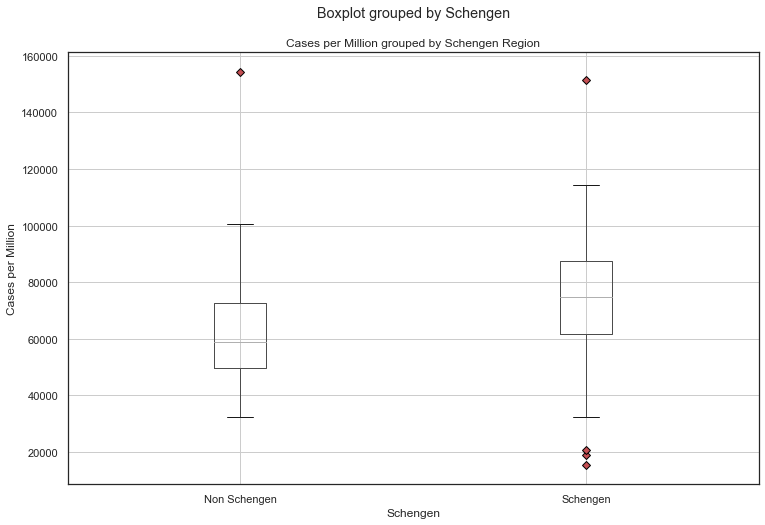

In [74]:
# Marsja, Erik. “Four Ways to Conduct One-Way ANOVA with Python.” Erik Marsja, 19 Nov. 2020, 
# www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/#:~:text=%20ANOVA%20in%20Python%20using%20Statsmodels%20%201,carry%20out%20the%20ANOVA%20in%20Python%0ASave%20More%20.

# Set up Outlier Markers
red_diamond = dict(markerfacecolor='r', marker='D')

#Create a boxplot
EuroSchengen.boxplot('Cases', by='Schengen', figsize=(12, 8), flierprops = red_diamond)

# ctrl = CovidEuro['Cases/M'][CovidEuro.Region == 'ctrl']
grps = pd.unique(EuroSchengen.Schengen.values)
d_data = {grp:EuroSchengen['Cases'][EuroSchengen.Schengen == grp] for grp in grps}

k = len(pd.unique(EuroSchengen.Schengen))  # number of conditions
N = len(EuroSchengen.values)  # conditions times participants
n = EuroSchengen.groupby('Schengen').size()[0] #Participants in each condition
plt.title ("Cases per Million grouped by Schengen Region")
plt.ylabel ("Cases per Million")

# Print
plt.savefig("Output/BoxplotSchengen.png")

In [75]:
# INDEPENDENT T TEST COMPARES THE MEANS FOR 2 GROUPS
st.ttest_ind(populationEuropeNS.Cases, populationEuropeS.Cases, equal_var=False)

Ttest_indResult(statistic=-0.655742151332363, pvalue=0.5164174659818122)

# MORE MAPS

In [57]:
MapsFrame = CovidAll.copy()
#MapsFrame.dtypes
#MapsFrame["country"].unique()
#MapsFrame.head()

In [58]:
latlong_df = pd.read_csv("Resources/Country Coordinates.csv")
latlong_df.head()

,latitude,longitude,country,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,33.939110,67.709953,Afghanistan,NaN,NaN,NaN,NaN
1,41.153332,20.168331,Albania,NaN,NaN,NaN,NaN
2,28.033886,1.659626,Algeria,NaN,NaN,NaN,NaN
3,42.546245,1.601554,Andorra,NaN,NaN,NaN,NaN
4,-11.202692,17.873887,Angola,NaN,NaN,NaN,NaN


In [59]:
#TRY TO NOT RERUN THIS AFTER THE FIRST KERNAL RE-START BECAUSE IT MAKES YOU RESTART THE KERNAL EVERY TIME!
del latlong_df["Unnamed: 3"]
del latlong_df["Unnamed: 4"]
del latlong_df["Unnamed: 5"]
del latlong_df["Unnamed: 6"]
latlong_df.head()

,latitude,longitude,country
0,33.939110,67.709953,Afghanistan
1,41.153332,20.168331,Albania
2,28.033886,1.659626,Algeria
3,42.546245,1.601554,Andorra
4,-11.202692,17.873887,Angola


In [60]:
#In MapsFrame it is "Country" and in latlong_df it is "country"
latlong_df=latlong_df.rename(columns = {"country" : "Country"})
latlong_df.head()

,latitude,longitude,Country
0,33.939110,67.709953,Afghanistan
1,41.153332,20.168331,Albania
2,28.033886,1.659626,Algeria
3,42.546245,1.601554,Andorra
4,-11.202692,17.873887,Angola


In [61]:
map_df=pd.merge(MapsFrame, latlong_df, on="Country", how = "inner")
map_df.tail()
#197 rows, 196 countries,  13 columns

,iso_code,continent,Country,date,Cases,Deaths,Vaxxed,Population,Density,GDP,HDI,Score,Rank,latitude,longitude
170,VEN,South America,Venezuela,2021-04-27,6812.540,73.217,NaN,28435943.0,36.253,16745.022,0.711,15.0,176.0,6.423750,-66.589730
171,VNM,Asia,Vietnam,2021-04-27,29.351,0.360,NaN,97338583.0,308.127,6171.884,0.704,36.0,104.0,14.058324,108.277199
172,YEM,Asia,Yemen,2021-04-27,208.543,40.468,NaN,29825968.0,53.508,1479.147,0.470,15.0,176.0,15.552727,48.516388
173,ZMB,Africa,Zambia,2021-04-27,4972.706,67.940,NaN,18383956.0,22.995,3689.251,0.584,33.0,117.0,-13.133897,27.849332
174,ZWE,Africa,Zimbabwe,2021-04-27,2567.731,105.296,0.43,14862927.0,42.729,1899.775,0.571,24.0,157.0,-19.015438,29.154857


In [62]:
#map_df["Country"].unique()

In [63]:
import plotly.express as px
import plotly.graph_objects as go

In [65]:
fig_GDP = px.choropleth(map_df,  # Input Pandas DataFrame
                    locations="Country",  # DataFrame column with locations
                    color="GDP",  # DataFrame column with color values
                    locationmode = 'country names', 
                    scope = 'world',
                    color_continuous_scale= "blues",
                    labels = {"GDP" : "GDP"},
                    range_color=(map_df["GDP"].min(), map_df["GDP"].max()),
                    color_continuous_midpoint=(map_df["GDP"].median())
                   )
fig_GDP.update_layout(title_text = "GDP Per Country")
fig_GDP.update_geos(projection_type="equirectangular")
fig_GDP.show() 